### Improving performance
- Model Selection
- Hyperparameter Tuning

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Adjusting Hyperparameters
- Manually
- RandomSearchCV (random search)
- GridSearchCV (exhaustive)

Hyperparameter tuning requires a validation set

In [3]:
# Printout Metrics
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true vs. y_preds on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
        'accuracy': round(accuracy, 2),
        'precision': round(accuracy, 2),
        'recall': round(recall, 2),
        'f1': round(f1, 2)
    }
    
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1:.2f}')
    
    return metric_dict

In [4]:
np.random.seed(42)

df = pd.read_csv('./data/heart-disease.csv')

# Shuffle data
df_shuffled = df.sample(frac=1)

X = df_shuffled.drop('target', axis=1)
y = df_shuffled['target']

# Split into train, validation and test sets
train_split = round(0.7 * len(df_shuffled))
valid_split = round(train_split + 0.15 * len(df_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.82, 'recall': 0.88, 'f1': 0.85}

RandomizedSearchCV

In [6]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Dict keys are the params
grid = {
    'n_estimators': [10, 100, 200, 500, 1000, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [7]:
np.random.seed(42)

X = df_shuffled.drop('target', axis=1)
y = df_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=grid, 
    n_iter=10, 
    cv=5, 
    verbose=2
)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [8]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [9]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 80.33%
Precision: 0.77
Recall: 0.82
F1: 0.79


In [10]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]
}

In [11]:
gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv=5,
    verbose=2
)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   26.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [12]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [13]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 81.97%
Precision: 0.76
Recall: 0.89
F1: 0.82


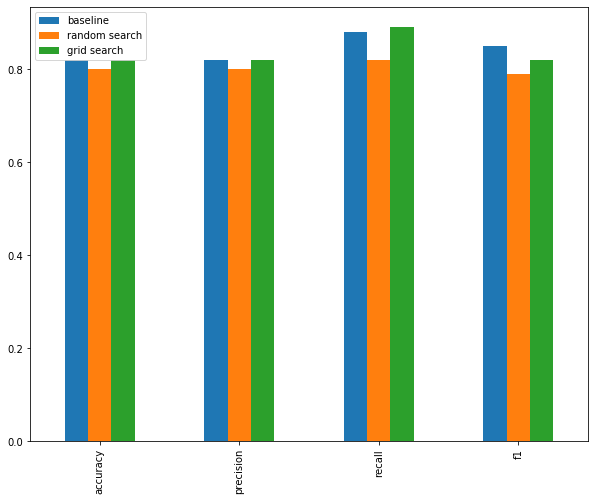

In [15]:
compare_metrics = pd.DataFrame({
    'baseline': baseline_metrics,
    'random search': rs_metrics,
    'grid search': gs_metrics
})

compare_metrics.plot.bar(figsize=(10, 8))

Saving and loading models
- Pickling
- Joblib

In [16]:
# Pickling
import pickle

# Saving model
pickle.dump(gs_clf, open('./models/gs_rfc_1.pkl', 'wb'))

In [17]:
# Loading model
loaded_gs_clf = pickle.load(open('./models/gs_rfc_1.pkl', 'rb'))

pickled_y_preds = loaded_gs_clf.predict(X_test)
evaluate_preds(y_test, pickled_y_preds)

Accuracy: 81.97%
Precision: 0.76
Recall: 0.89
F1: 0.82


{'accuracy': 0.82, 'precision': 0.82, 'recall': 0.89, 'f1': 0.82}

In [18]:
# Joblib
from joblib import dump, load

# save
dump(gs_clf, filename='./models/gs_rfc_1.joblib')

['gs_rfc_1.joblib']

In [19]:
# load
loaded_gs_clf = load(filename='./models/gs_rfc_1.joblib')

joblib_y_preds = loaded_gs_clf.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 81.97%
Precision: 0.76
Recall: 0.89
F1: 0.82


{'accuracy': 0.82, 'precision': 0.82, 'recall': 0.89, 'f1': 0.82}